### LAB-9
Name: Raghavendra Deshmukh

StudenID: 8854506


Dense Neural Network

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


Load the fMNIST dataset

In [2]:
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Check the shape of training and testing data
print("Training set shape:", train_images.shape)
print("Number of training samples:", len(train_images))
print("Image dimensions:", train_images[0].shape)

print("Test set shape:", test_images.shape)
print("Number of test samples:", len(test_images))

# Check the number of classes (categories) in the dataset
num_classes = len(np.unique(train_labels))
print("Number of classes:", num_classes)

Training set shape: (60000, 28, 28)
Number of training samples: 60000
Image dimensions: (28, 28)
Test set shape: (10000, 28, 28)
Number of test samples: 10000
Number of classes: 10


Visualize some sample images

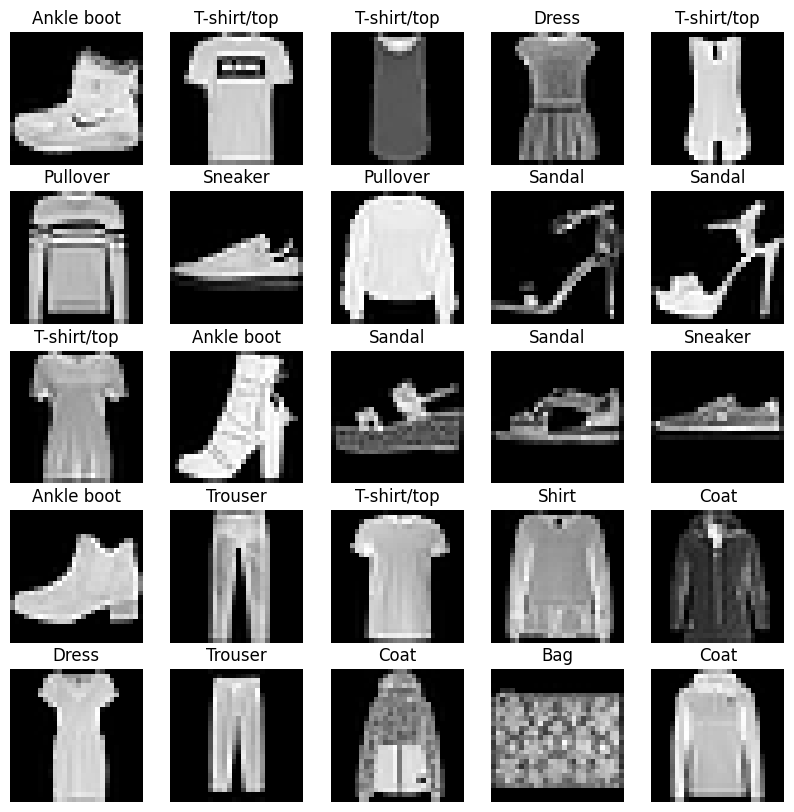

In [4]:


# Define class names for better understanding of the labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_labels[train_labels[i]])
    plt.axis('off')
plt.show()

Check class distribution

In [5]:


# Class distribution in the training set
unique_classes, class_counts = np.unique(train_labels, return_counts=True)
print("Class distribution in the training set:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")



Class distribution in the training set:
Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples


- The fMNIST dataset is a modified version of the well-known MNIST dataset, comprising grayscale images depicting diverse fashion items.

- It encompasses 60,000 samples for training and 10,000 for testing, each image occupying a space of 28x28 pixels.

- Notably, the training set exhibits a fairly balanced class distribution, containing an equal number of samples for each class. Analyzing this dataset is crucial for comprehending its composition and class balance, which in turn aids in designing the model and preprocessing the data effectively.

2. Train a dense neural network using Keras (2 points)

In [6]:
# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images for the dense neural network
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

Building the model

In [7]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Compile model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [9]:


num_epochs = 5
batch_size = 32

model.fit(train_images, train_labels, epochs=num_epochs,
                    batch_size=batch_size, validation_split=0.1)



Epoch 1/5
1688/1688 [==============================] - 11s 4ms/step - loss: 0.5116 - accuracy: 0.8212 - val_loss: 0.3953 - val_accuracy: 0.8582
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3757 - accuracy: 0.8626 - val_loss: 0.3636 - val_accuracy: 0.8672
Epoch 3/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3386 - accuracy: 0.8758 - val_loss: 0.3782 - val_accuracy: 0.8652
Epoch 4/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3137 - accuracy: 0.8831 - val_loss: 0.3352 - val_accuracy: 0.8770
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.8903 - val_loss: 0.3230 - val_accuracy: 0.8843


The architecture comprises two hidden layers with ReLU activation functions and an output layer using softmax activation for multi-class classification. During training, the model undergoes a specified number of epochs (5 in this instance) with a designated batch size (32 in this instance).

3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [10]:


test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)



313/313 [==============================] - 1s 4ms/step - loss: 0.3386 - accuracy: 0.8749
Test accuracy: 0.8748999834060669


313/313 [==============================] - 1s 2ms/step
Total number of incorrect indices 1251


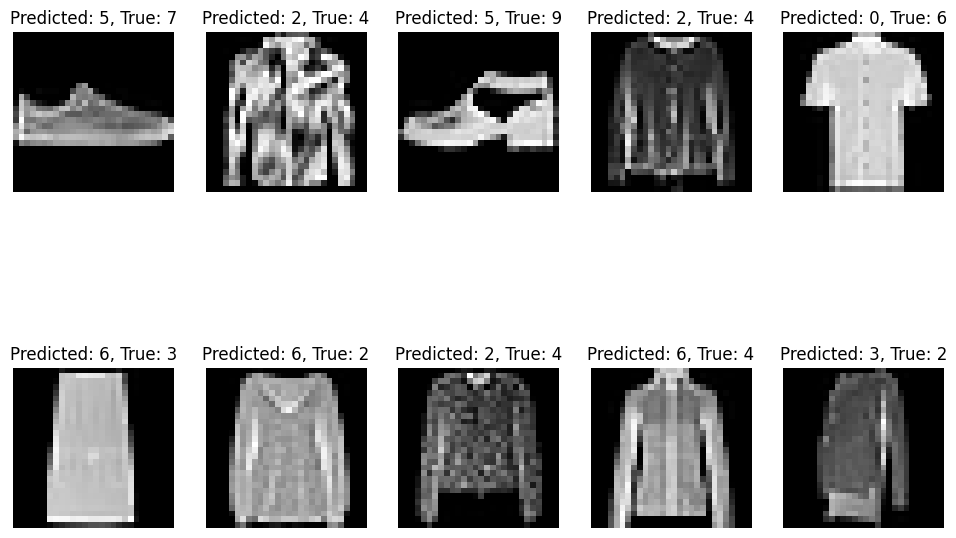

In [12]:


# Get predicted labels for the test set
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# indices of misclassified samples
misclassified_indices = np.where(test_labels != predicted_labels)[0]
print('Total number of incorrect indices', len(misclassified_indices))
# misclassified samples with their predicted and true labels
plt.figure(figsize=(12, 8))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(
        f"Predicted: {predicted_labels[index]}, True: {test_labels[index]}")
    plt.axis('off')
plt.show()



SUMMARY

- By examining misclassified examples, valuable insights into patterns or shared characteristics that challenge the model's recognition abilities can be gained.

- It is advisable to tackle class imbalances and optimize the model's architecture to enhance accuracy on difficult classes.

- Continuing with in-depth analysis and conducting further experiments are critical steps to fine-tune the model for improved overall performance and generalization.